In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 22 15:32:55 2022

@author: mariemdiane
"""

# importing Image class from PIL package
import glob
import scipy
import skimage
import matplotlib.pyplot as plt
from scipy import fft
from skimage import data, color
import numpy as np        
import skimage
import os
import cv2
from skimage import io
# from natsort import natsorted
from tqdm import tqdm
import numpy as np
from scipy import ndimage
from PIL import Image, ImageOps
import time


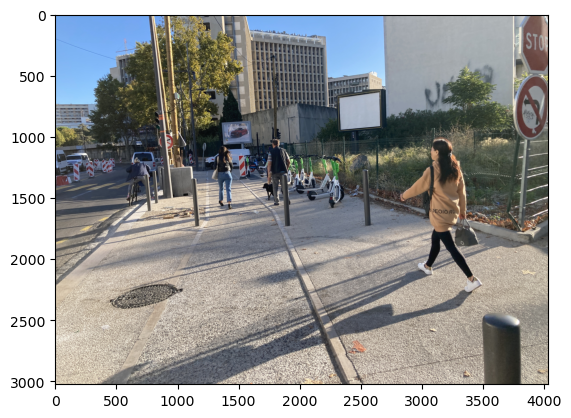

In [2]:

# opening a multiband image (RGB specifically)
#im = Image.open(r"/Users/mariemdiane/Documents/image_fall.png")
im = Image.open(r"/Users/laurentperrinet/quantic/2022_archives/2022_RTC/IMG_6282.JPG") # une image au pif
plt.imshow(im)

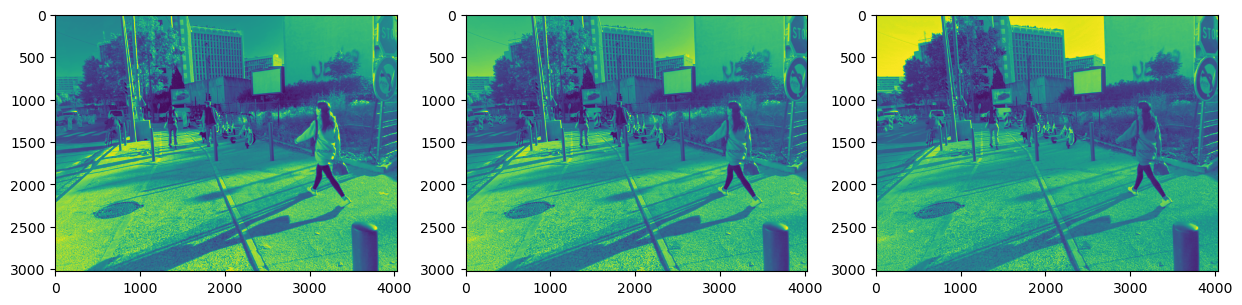

In [3]:
# split() method: this will split the image in individual bands and return a tuple
im1 = Image.Image.split(im)
  
# showing each band
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, c in enumerate(['R', 'G', 'B']):
    axs[i].imshow(im1[i])
# im1[0].show()
# im1[1].show()
# im1[2].show()

# j'ai renommé chaque image split imA, imB, imC

In [4]:
N_X, N_Y = np.array(im1[0]).shape
N_X, N_Y

(3024, 4032)

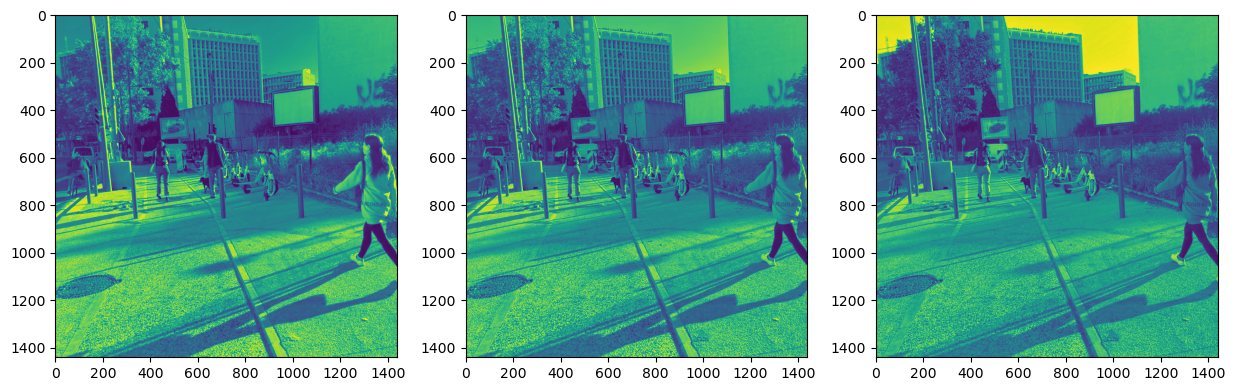

In [5]:
# img = Image.open(r"/Users/mariemdiane/Desktop/imA.png")

# D'abord resize en square
# img = img.resize((1440,1440))
# plt.imshow(img)

# Laurent: il vaut mieux faire un crop, le resize va introduire un écrasement 
size = 1440
shift_X, shift_Y = 10, 242
img = np.zeros((size, size, 3))
for i, c in enumerate(['R', 'G', 'B']):
    img[:, :, i] = np.array(im1[i])[::2, ::2][shift_X:(shift_X+size), shift_Y:(shift_Y+size)]


for i, c in enumerate(['R', 'G', 'B']):
    img[:, :, i] -= img[:, :, i].mean()
    img[:, :, i] /= img[:, :, i].std()


# showing each band
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, c in enumerate(['R', 'G', 'B']):
    axs[i].imshow(img[:, :, i])

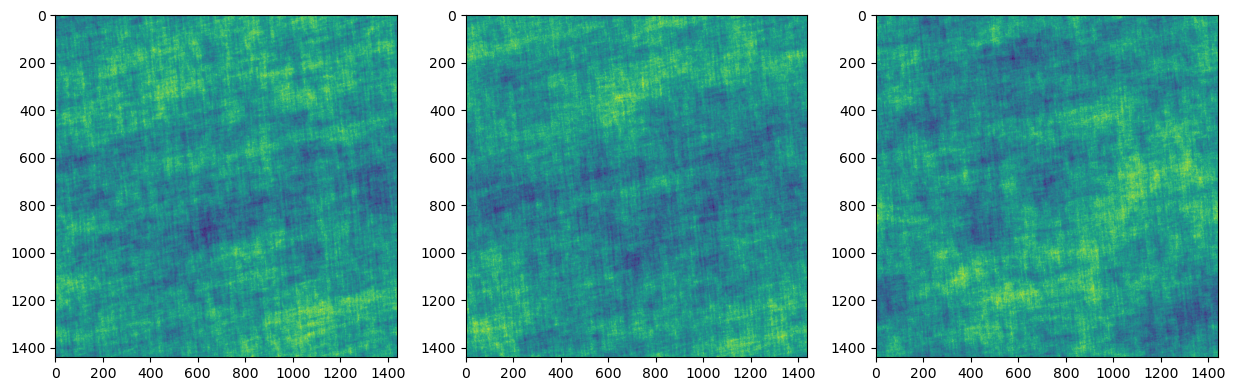

In [6]:
# On fait la texture fft sur cette image
image_phase = np.zeros_like(img)

for i, c in enumerate(['R', 'G', 'B']):
    F2D = fft.rfft2(img[:, :, i], s=None, norm=None)
    phase = 2 * np.pi * np.random.rand(F2D.shape[0], F2D.shape[1])
    F_random = np.exp(1j * phase)
    Fz_scrambled = F_random * F2D
    image_phase[:, :, i] = fft.irfft2(Fz_scrambled)


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, c in enumerate(['R', 'G', 'B']):
    axs[i].imshow(image_phase[:, :, i])
# OK, on fait pareil sur les deux autres

In [7]:
# # Numéro 2
# img = Image.open(r"/Users/mariemdiane/Desktop/imB.png")

# # D'abord resize en square
# img = img.resize((1440,1440))
# plt.imshow(img)

# # On fait la texture fft sur cette image

# F2D = fft.rfft2(img, s=None, norm=None)
# phase = 2 * np.pi * np.random.rand(F2D.shape[0], F2D.shape[1])
# F_random = np.exp(1j * phase)
# Fz_scrambled = F_random * F2D
# image_phase2 = fft.irfft2(Fz_scrambled)
# plt.imshow(image_phase2);

In [8]:
# # Numéro 3
# img = Image.open(r"/Users/mariemdiane/Desktop/imC.png")

# # D'abord resize en square
# img = img.resize((1440,1440))
# plt.imshow(img)


# # On fait la texture fft sur cette image

# F2D = fft.rfft2(img, s=None, norm=None)
# phase = 2 * np.pi * np.random.rand(F2D.shape[0], F2D.shape[1])
# F_random = np.exp(1j * phase)
# Fz_scrambled = F_random * F2D
# image_phase3 = fft.irfft2(Fz_scrambled)
# plt.imshow(image_phase3);

In [9]:
for i, c in enumerate(['R', 'G', 'B']):
    im = image_phase[:, :, i]
    print(im.mean(), im.std())


3.1031418861127833e-17 0.9422127771531515
7.672874681298304e-17 0.980685268524201
-2.895146399709243e-17 0.8720857360112082


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


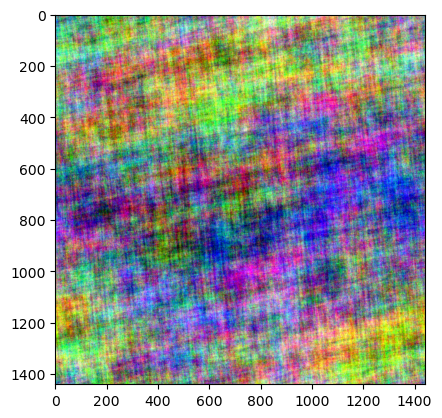

In [10]:
contraste = .5
plt.imshow(.5 + image_phase*.5*contraste)